In [2]:
ls Data

depth_training_image_data.npy*
depth_validation_image_data.npy
flipped_neg_data_in_camera_coordinates.csv
matched_neg_data_in_camera_coordinates.csv*
matched_pos_data_in_camera_coordinates.csv*
neg_train_poses.npy
neg_val_poses.npy
pos_train_poses.npy
pos_val_poses.npy
prior_compact.npy*
prior_pos.npy*
training_image_data.npy*
training_uids.npy*
uids.npy*
validation_image_data.npy*
validation_uids.npy*


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage

In [4]:
df = pd.read_csv('data/matched_pos_data_in_camera_coordinates.csv')
df.head()

,id,x,y,z,rx,ry,rz,rot_mag
0,101807,-0.043541,0.030550,0.479822,0.826096,0.214983,-0.520911,4.493957
1,101808,-0.032498,0.032890,0.480456,-0.844740,-0.201629,0.495742,1.783953
2,101809,-0.004123,-0.024758,0.427839,-0.794870,0.535198,-0.285909,1.898687
3,101811,-0.049009,0.032504,0.471790,0.840673,0.279357,-0.463926,4.501211
4,101812,-0.046870,0.029357,0.475877,-0.845062,-0.201496,0.495246,1.817191


In [13]:
print('x', df['x'].min(), df['x'].max())
print('y', df['y'].min(), df['y'].max())
print('z', df['z'].min(), df['z'].max())

x -0.11448083617113874 0.02998685945970189
y -0.16689919684337934 0.07206119878809979
z 0.4016680300406181 0.5670741942050048


<IPython.core.display.Javascript object>


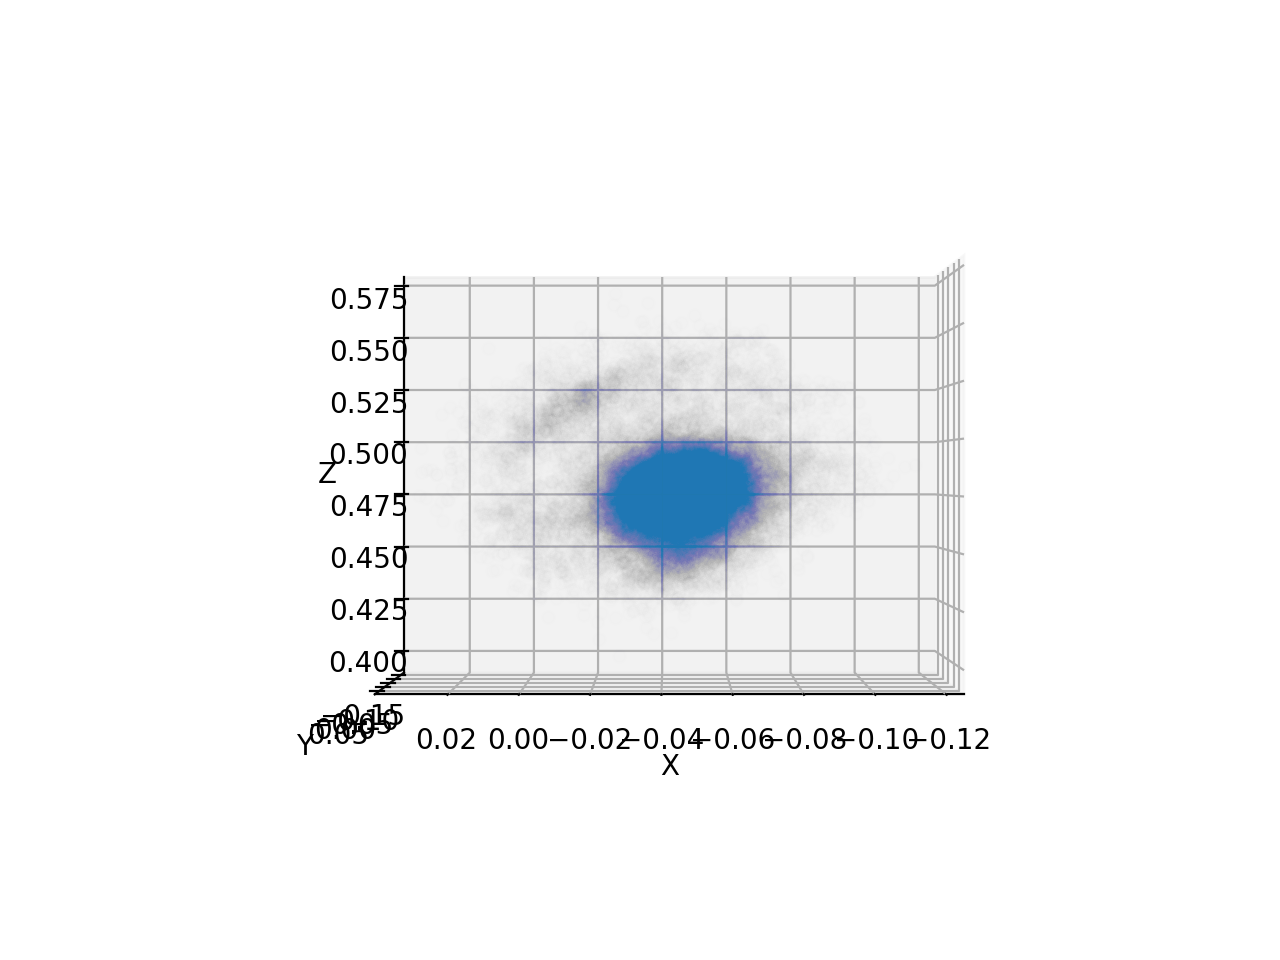

In [12]:
% matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['x'], df['y'], df['z'], alpha=0.005)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=0, azim=90) # view xz
# ax.view_init(elev=0, azim=180) # view yz
plt.show()

In [2]:
imgs = np.load('Data/validation_image_data.npy')

In [19]:
imgs.shape

(1000, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5,1,'D Channel')

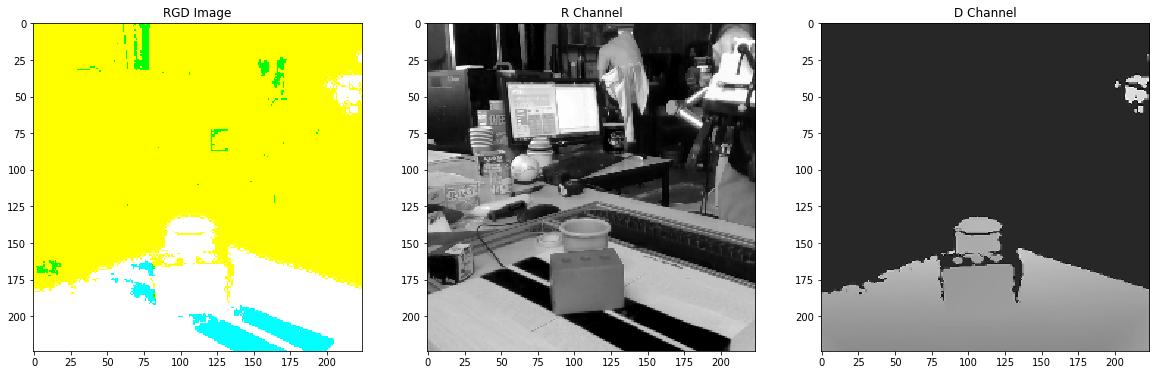

In [4]:
i = 111
fig, axes = plt.subplots(1,3, figsize=(20,8))
axes[0].imshow(imgs[i])
axes[0].set_title('RGD Image')
axes[1].imshow(imgs[i,:,:,0], cmap='gray')
axes[1].set_title('R Channel')
axes[2].imshow(imgs[i,:,:,2], cmap='gray')
axes[2].set_title('D Channel')
# axes[3].imshow(skimage.exposure.equalize_hist(imgs[i,:,:,2]), cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


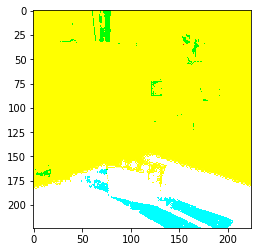

In [42]:
plt

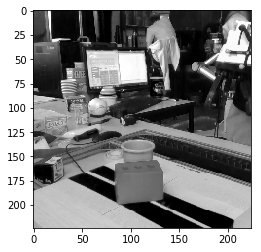

In [25]:
plt

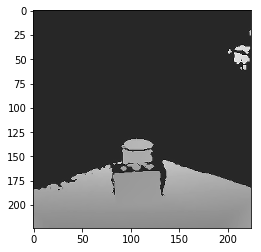

In [26]:
plt.imshow(imgs[111,:,:,2], cmap='gray')

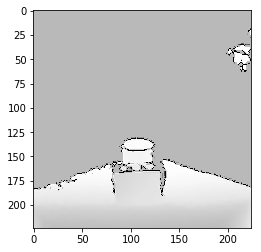

In [33]:
img = skimage.exposure.equalize_hist(imgs[111,:,:,2])
plt.imshow(img, cmap='gray')

/Users/nolandey/anaconda/envs/tensorflow3/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


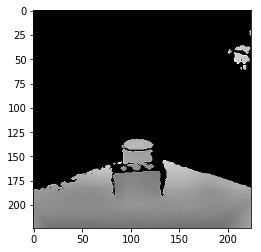

In [41]:
img = skimage.exposure.equalize_adapthist(imgs[111,:,:,2]/255)
plt.imshow(img, cmap='gray')

In [6]:
vuids = np.load('validation_uids.npy')

In [7]:
vuids.shape

(1000,)

In [20]:
np.max(imgs[0,:,:,2])

224.67133

In [54]:
pd.read_csv('Data/flipped_neg_data_in_camera_coordinates.csv').values.shape

(32124, 8)

In [55]:
np.load('Data/depth_training_image_data.npy').shape

(31123, 224, 224)

In [58]:
tuids = np.load('Data/training_uids.npy')
tuids.shape

(31123,)

In [59]:
vuids = np.load('Data/validation_uids.npy')
vuids.shape

(1000,)